# Telecome churn case study

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
%config IPCompleter.greedy=True

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# 1. Load data

In [3]:
df = pd.read_csv('./telecom_churn_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


**The given data has 99999 rows and 226 features. Let's look at the first few rows to get an idea.**

In [5]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

# 2. Prepare data

### 2.1 Check for null values
Looks like there are lots of columns with null values.

In [6]:
df.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

### 2.2 Identify high value customers
The high value customers are those customers who are above 0.70 quantile of the average recharge amount for first **two months**. The below snipper identifies such customers.

Total # of high value customers = **29979**

In [7]:
avg_rech = (df.total_rech_amt_6 + df.total_rech_amt_7) / 2
df = df.loc[avg_rech > avg_rech.quantile(.7)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 51.9+ MB


### 2.3 Remove those columns for which for than 60% of data is missing

In [8]:
df = df.drop(df.loc[:,list((100*(df.isnull().sum()/len(df.index)) > 60))].columns, 1)

After removeing such columns, we are still left with **186 columns**. Let's see if we can reduce the features even further.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Columns: 186 entries, mobile_number to sep_vbc_3g
dtypes: float64(143), int64(35), object(8)
memory usage: 42.8+ MB


### 2.4 Remove those rows who have > 5 NaNs
There are still some rows with null values. Remove them gracefully.

In [10]:
df = df.loc[df.isnull().sum(axis=1) < 5]

In [11]:
df.isnull().sum()

mobile_number             0
circle_id                 0
loc_og_t2o_mou            0
std_og_t2o_mou            0
loc_ic_t2o_mou            0
last_date_of_month_6      0
last_date_of_month_7      0
last_date_of_month_8      0
last_date_of_month_9      0
arpu_6                    0
arpu_7                    0
arpu_8                    0
arpu_9                    0
onnet_mou_6               0
onnet_mou_7               0
onnet_mou_8               0
onnet_mou_9               0
offnet_mou_6              0
offnet_mou_7              0
offnet_mou_8              0
offnet_mou_9              0
roam_ic_mou_6             0
roam_ic_mou_7             0
roam_ic_mou_8             0
roam_ic_mou_9             0
roam_og_mou_6             0
roam_og_mou_7             0
roam_og_mou_8             0
roam_og_mou_9             0
loc_og_t2t_mou_6          0
loc_og_t2t_mou_7          0
loc_og_t2t_mou_8          0
loc_og_t2t_mou_9          0
loc_og_t2m_mou_6          0
loc_og_t2m_mou_7          0
loc_og_t2m_mou_8    

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27960 entries, 8 to 99997
Columns: 186 entries, mobile_number to sep_vbc_3g
dtypes: float64(143), int64(35), object(8)
memory usage: 39.9+ MB


### 2.5 Drop irrelavant cols
Drop those rows who have only single values

In [13]:
df = df.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9'], axis=1)

In [14]:
df = df.drop(['std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9'], axis=1)

In [15]:
df = df.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'], axis=1)

In [16]:
df = df.drop(['mobile_number', 'circle_id'], axis=1)

In [17]:
df = df.drop(['std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'], axis=1)

In [18]:
df = df.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9'], axis=1)

In [19]:
df = df.drop(['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'last_day_rch_amt_9'], axis=1)

### 2.6 Calculate Churn label
Once the data has been cleaned and high value customers have been identified, we can now calculate the **Churn** label for each row.

A customer is going is churning if his ic/og is zero and 2g/3g vol is zero.

In [20]:
df['churn'] = df['total_ic_mou_9'] + df['total_og_mou_9'] + df['vol_2g_mb_9'] + df['vol_3g_mb_9']

In [21]:
df['churn'] = df['churn'].apply(lambda x: 0 if x > 0 else 1)

In [22]:
df['churn'].value_counts()

0    27014
1      946
Name: churn, dtype: int64

# 3. Data Analysis

### 3.1 Analyze churn data vs non-churn data

In [23]:
churns = df.loc[df['churn'] == 1]
nonchurns = df.loc[df['churn'] == 0]

import matplotlib.pyplot as plt
import seaborn as sns

def plotFig(feature, df, str):
    f, ax = plt.subplots(figsize=(10, 3))
    sns.distplot(df[feature + '_6'], hist=False, label=feature + '_6')
    sns.distplot(df[feature + '_7'], hist=False, label=feature + '_7')
    sns.distplot(df[feature + '_8'], hist=False, label=feature + '_8')
    sns.distplot(df[feature + '_9'], hist=False, label=feature + '_9')
    ax.set(xlabel=(feature + '_' + str))
    plt.legend();

#### 3.1.1 Incoming and outgoing mou analysis

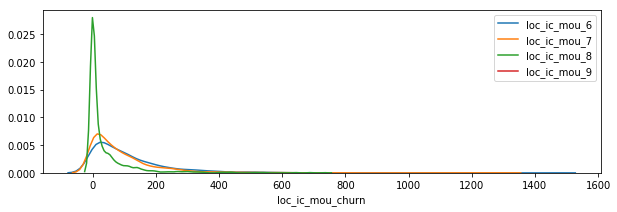

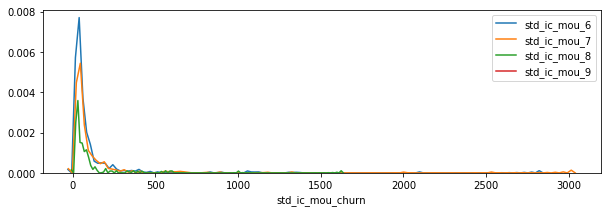

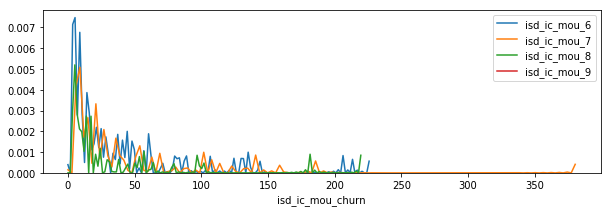

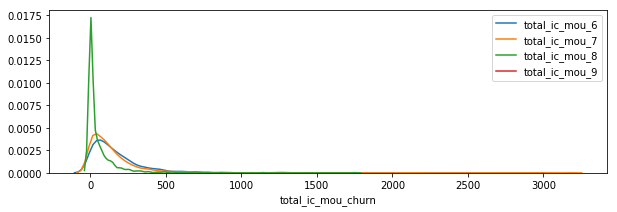

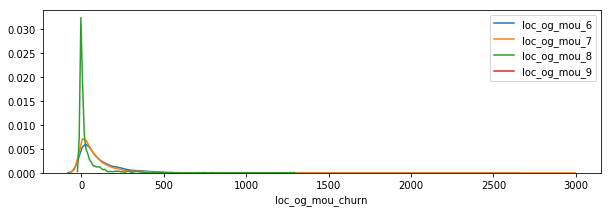

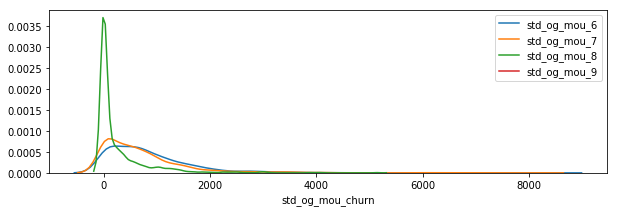

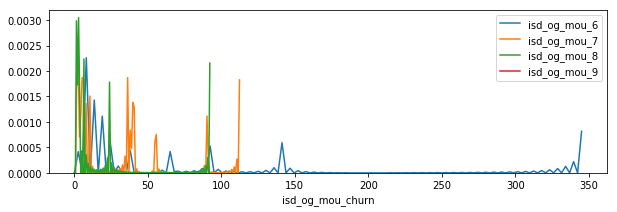

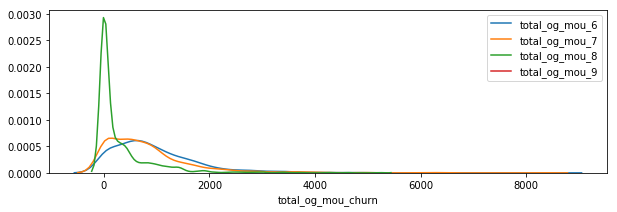

In [24]:
# ic mou plots for churns
plotFig('loc_ic_mou', churns, 'churn')
plotFig('std_ic_mou', churns, 'churn')
plotFig('isd_ic_mou', churns, 'churn')
plotFig('total_ic_mou', churns, 'churn')

# og plots mou for churns
plotFig('loc_og_mou', churns, 'churn')
plotFig('std_og_mou', churns, 'churn')
plotFig('isd_og_mou', churns, 'churn')
plotFig('total_og_mou', churns, 'churn')

The above graphs for churned customers clearly suggest that there has been drop in incoming and outgoing calls MOU across 3 months.

Let's look at the same features for non-churners.

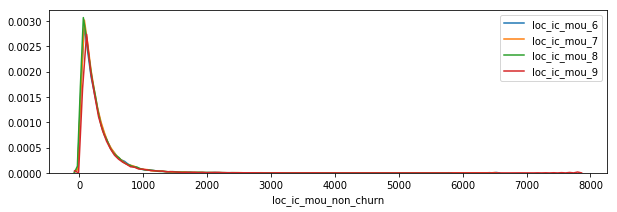

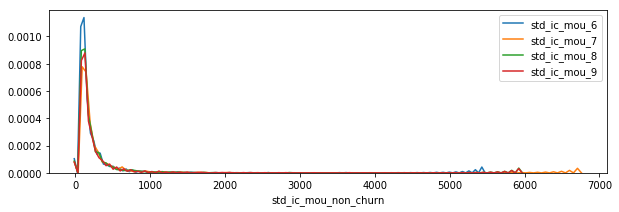

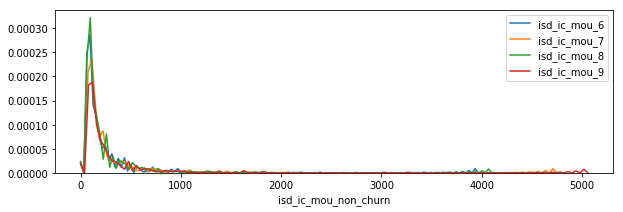

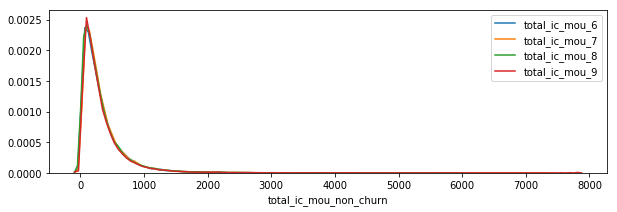

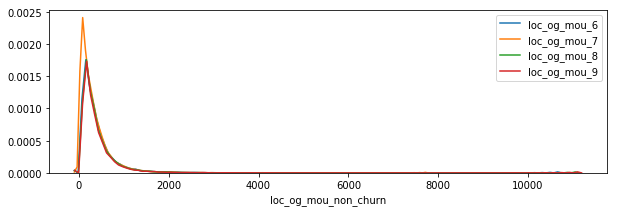

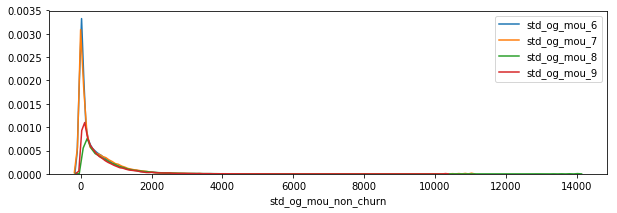

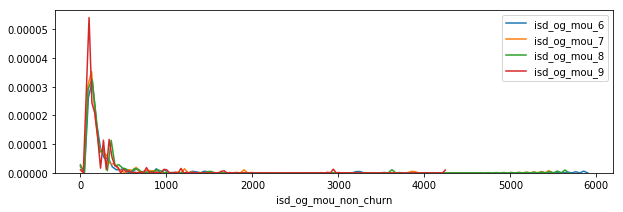

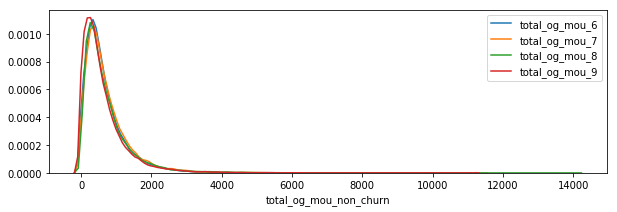

In [25]:
# ic plots for non-churns
plotFig('loc_ic_mou', nonchurns, 'non_churn')
plotFig('std_ic_mou', nonchurns, 'non_churn')
plotFig('isd_ic_mou', nonchurns, 'non_churn')
plotFig('total_ic_mou', nonchurns, 'non_churn')

# og plots for non-churns
plotFig('loc_og_mou', nonchurns, 'non_churn')
plotFig('std_og_mou', nonchurns, 'non_churn')
plotFig('isd_og_mou', nonchurns, 'non_churn')
plotFig('total_og_mou', nonchurns, 'non_churn')

The above graph are for non-churns. Clearly, the ic/og MOUs are stable across the months.

#### 3.1.2 2G & 3G volume analysis

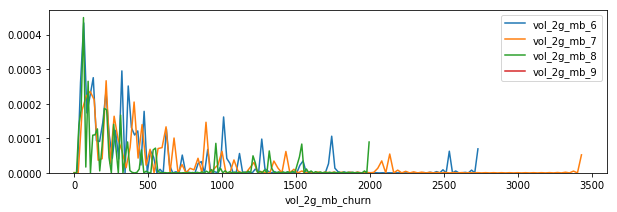

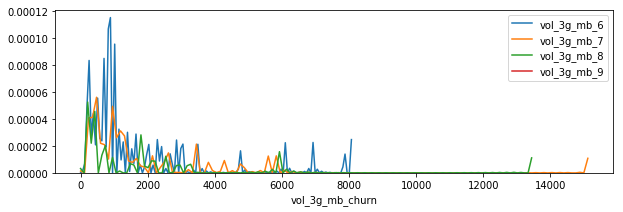

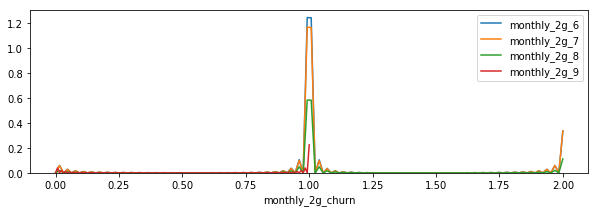

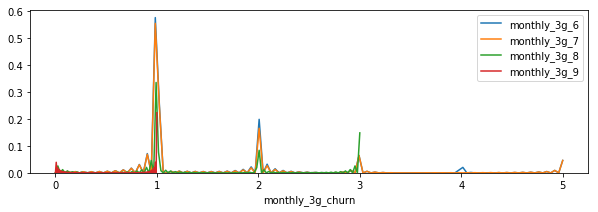

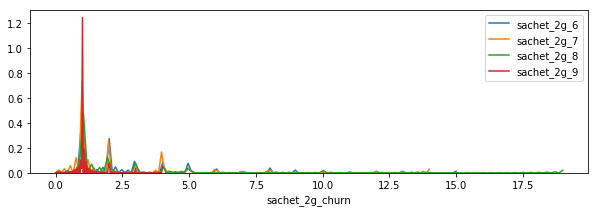

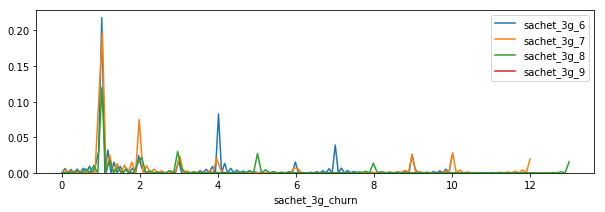

In [26]:
plotFig('vol_2g_mb', churns, 'churn')
plotFig('vol_3g_mb', churns, 'churn')
plotFig('monthly_2g', churns, 'churn')
plotFig('monthly_3g', churns, 'churn')
plotFig('sachet_2g', churns, 'churn')
plotFig('sachet_3g', churns, 'churn')

The above graphs for churned customers clearly suggest that there has been drop in i2g/36 volumes across 3 months.

Let's look at the same featurss for non-churners.

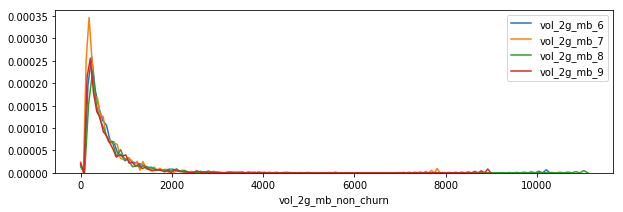

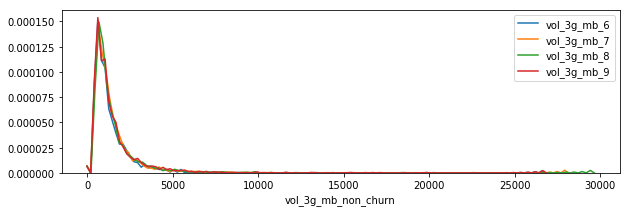

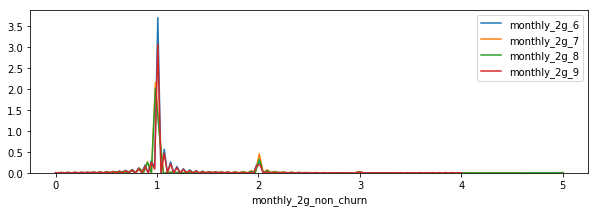

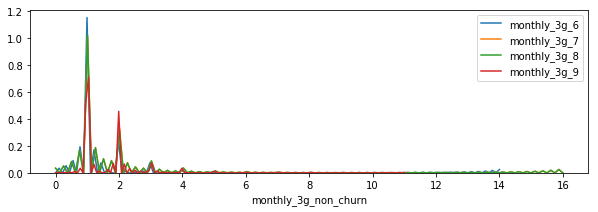

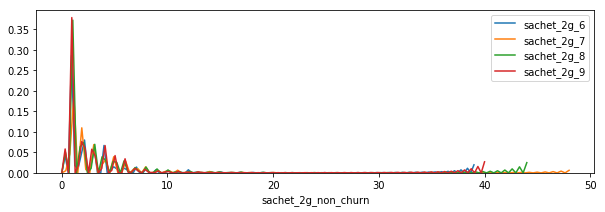

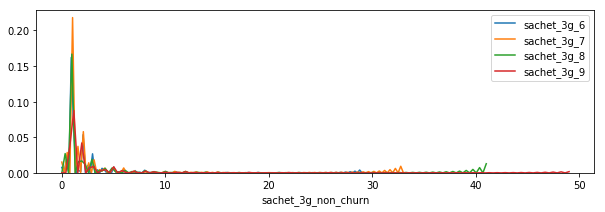

In [27]:
plotFig('vol_2g_mb', nonchurns, 'non_churn')
plotFig('vol_3g_mb', nonchurns, 'non_churn')
plotFig('monthly_2g', nonchurns, 'non_churn')
plotFig('monthly_3g', nonchurns, 'non_churn')
plotFig('sachet_2g', nonchurns, 'non_churn')
plotFig('sachet_3g', nonchurns, 'non_churn')

The above graph are for non-churns. Clearly, the 2g/3g vols are stable across the months.

#### From the above graph, it can be inferred that for churned users, the **MOUs** and **VOLs** are steadily decreasing. But for the non-churners, the distributions hardly vary across the first three months.

#### 3.1.3 Recharge amount analysis

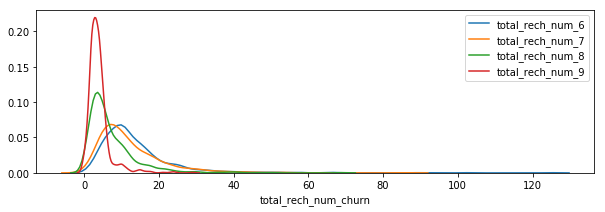

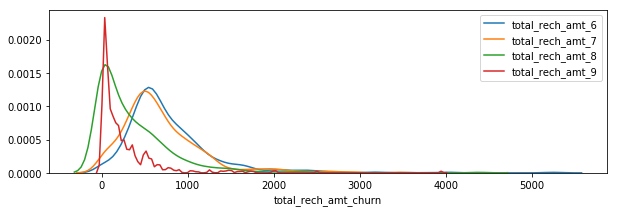

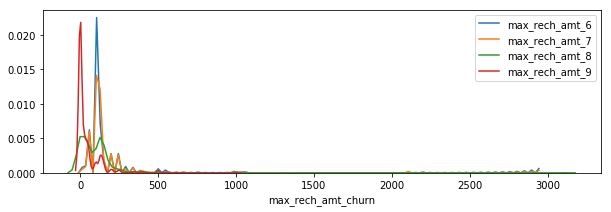

In [28]:
plotFig('total_rech_num', churns, 'churn')
plotFig('total_rech_amt', churns, 'churn')
plotFig('max_rech_amt', churns, 'churn')

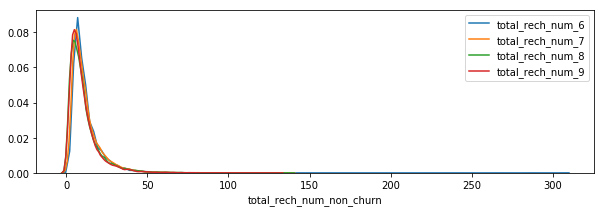

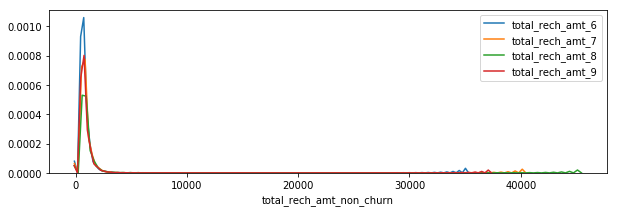

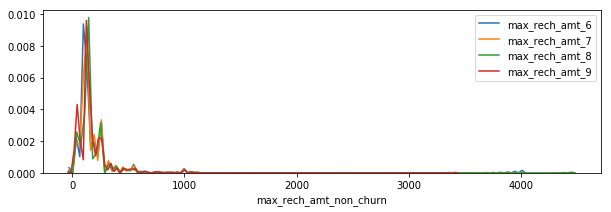

In [29]:
plotFig('total_rech_num', nonchurns, 'non_churn')
plotFig('total_rech_amt', nonchurns, 'non_churn')
plotFig('max_rech_amt', nonchurns, 'non_churn')

#### Again, from the above graphs, it can be inferred that for churned users, the rech_num  and rech_amt are steadily decreasing. But for the non-churners, the distributions hardly vary across the first three months.

#### 3.1.4 ARPU analysis

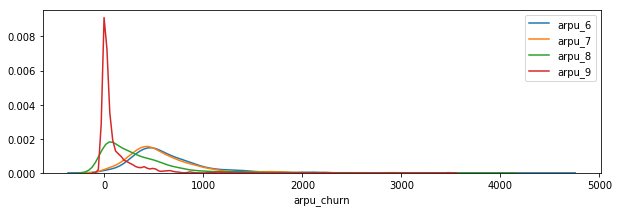

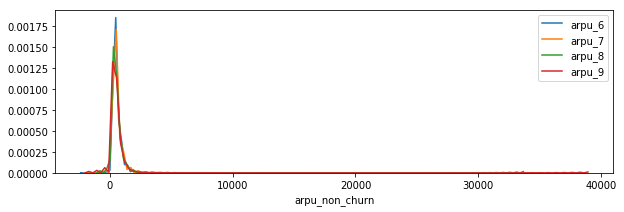

In [30]:
plotFig('arpu', churns, 'churn')
plotFig('arpu', nonchurns, 'non_churn')

Again, from the above graphs, it can be inferred that for churned users, the ARPU steadily decreasing. But for the non-churners, the distributions are stable across the first three months.

###  3.2 Create derived columns

From the above graphs, seems like the users who are going to churn have monotonically decreasing ic/og mou and 2g/3g data volumes. To capture the decreasing trends across the first three months, we can derive new features as follows.

**delta_f = (f_8 - mean(f_6, f_7)) / mean(f_6, f_7, f_8)**

where, **f** is a feature, such as *loc_ic_mou*

For example,

*delta_loc_ic_mou = 
   (loc_ic_mou_8 - mean(loc_ic_mou_6, loc_ic_mou_7)) / mean(loc_ic_mou_6, loc_ic_mou_7, loc_ic_mou_8)*
   
By this formula, we are trying to capture the change that is happening in 8th month w.r.t. 6th and 7th months.

In [31]:
def createDerivedFeature(df, feature):
    newFeature = 'delta_' + feature
    
    feature6 = feature + '_6'
    feature7 = feature + '_7'
    feature8 = feature + '_8'
    
    feature_avg = df[[feature6, feature7, feature8]].mean(axis=1)
    df[newFeature] = ((df[feature8] - ((df[feature6] + df[feature7]) / 2)) / feature_avg)
                   
    df.drop([feature6, feature7, feature8], axis=1, inplace=True)

In [32]:
# Incoming
createDerivedFeature(df, 'loc_ic_t2t_mou')
createDerivedFeature(df, 'loc_ic_t2m_mou')
createDerivedFeature(df, 'loc_ic_t2f_mou')
createDerivedFeature(df, 'loc_ic_mou')

createDerivedFeature(df, 'std_ic_t2t_mou')
createDerivedFeature(df, 'std_ic_t2m_mou')
createDerivedFeature(df, 'std_ic_t2f_mou')
createDerivedFeature(df, 'std_ic_mou')

createDerivedFeature(df, 'spl_ic_mou')
createDerivedFeature(df, 'isd_ic_mou')
createDerivedFeature(df, 'ic_others')
createDerivedFeature(df, 'roam_ic_mou')

createDerivedFeature(df, 'total_ic_mou')

# Outgoing
createDerivedFeature(df, 'loc_og_t2t_mou')
createDerivedFeature(df, 'loc_og_t2m_mou')
createDerivedFeature(df, 'loc_og_t2f_mou')
createDerivedFeature(df, 'loc_og_t2c_mou')
createDerivedFeature(df, 'loc_og_mou')

createDerivedFeature(df, 'std_og_t2t_mou')
createDerivedFeature(df, 'std_og_t2m_mou')
createDerivedFeature(df, 'std_og_t2f_mou')
createDerivedFeature(df, 'std_og_mou')

createDerivedFeature(df, 'spl_og_mou')
createDerivedFeature(df, 'isd_og_mou')
createDerivedFeature(df, 'og_others')
createDerivedFeature(df, 'roam_og_mou')

createDerivedFeature(df, 'total_og_mou')

createDerivedFeature(df, 'onnet_mou')
createDerivedFeature(df, 'offnet_mou')

# 2G and 3G
createDerivedFeature(df, 'vol_2g_mb')
createDerivedFeature(df, 'vol_3g_mb')
createDerivedFeature(df, 'monthly_2g')
createDerivedFeature(df, 'monthly_3g')
createDerivedFeature(df, 'sachet_2g')
createDerivedFeature(df, 'sachet_3g')

# Recharge and revenure
createDerivedFeature(df, 'total_rech_num')
createDerivedFeature(df, 'max_rech_amt')
createDerivedFeature(df, 'total_rech_amt')
createDerivedFeature(df, 'arpu')

df['vbc_3g_6'] = df['jun_vbc_3g']
df['vbc_3g_7'] = df['jul_vbc_3g']
df['vbc_3g_8'] = df['aug_vbc_3g']
createDerivedFeature(df, 'vbc_3g')
df.drop(['jun_vbc_3g', 'jul_vbc_3g', 'aug_vbc_3g'], axis=1, inplace=True)

There are some features (f) for which mean is zero (the value across three months is zero), and hence the **delta_f** comes out to be **NaN**. Replace those with zero(0).

In [33]:
df = df.fillna(0)

### 3.3 Remove _9 columns

In [34]:
cols = df.columns
cols = [i for i in cols if '_9'  in i] 
cols.append('sep_vbc_3g')
df = df.drop(cols, axis=1)

# 4. Handle class imbalance

There is a ridiculously high class imbalance. If we go ahead and build models on with such imbalanced data, then the model will also be biased. 

To avoid this, we will do over-sampling to increase the count to minority label. We will be using **SMOTE** technique to improve the class balance.


In [35]:
df.churn.value_counts()

0    27014
1      946
Name: churn, dtype: int64

In [36]:
from imblearn.over_sampling import SMOTE
y = df.pop('churn')
X = df

In [37]:
# Keep the ratio of minority : majority = 0.8
smote = SMOTE(ratio=0.8, random_state=42)
X_blncd, y = smote.fit_sample(X, y)

# Check the new ratio. 
X = pd.DataFrame(X_blncd , columns=X.columns)
unique, counts = np.unique(y, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0 27014]
 [    1 21611]]


# 5. Identify the relavant features and provide recommendations 

One of the asks in the case study is to identify the features which are responsible for identifying if a customer will churn or not. 

Due to the high number of features, we will be using **RFE** to select top 20 driving feartures fot this data.

In [38]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression

In [39]:
# Running RFE with the output number of the variable equal to 20
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             
rfe = rfe.fit(X, y)

Some of these columns can be highly related. Let's remove such columns.

In [40]:
col = X.columns[rfe.support_]
col

Index(['delta_loc_ic_t2t_mou', 'delta_loc_ic_t2m_mou', 'delta_std_ic_t2t_mou', 'delta_roam_ic_mou', 'delta_total_ic_mou', 'delta_loc_og_t2t_mou', 'delta_loc_og_t2m_mou', 'delta_std_og_t2t_mou', 'delta_og_others', 'delta_roam_og_mou', 'delta_onnet_mou', 'delta_offnet_mou', 'delta_vol_3g_mb', 'delta_sachet_2g', 'delta_sachet_3g', 'delta_total_rech_num', 'delta_max_rech_amt', 'delta_total_rech_amt', 'delta_arpu', 'delta_vbc_3g'], dtype='object')

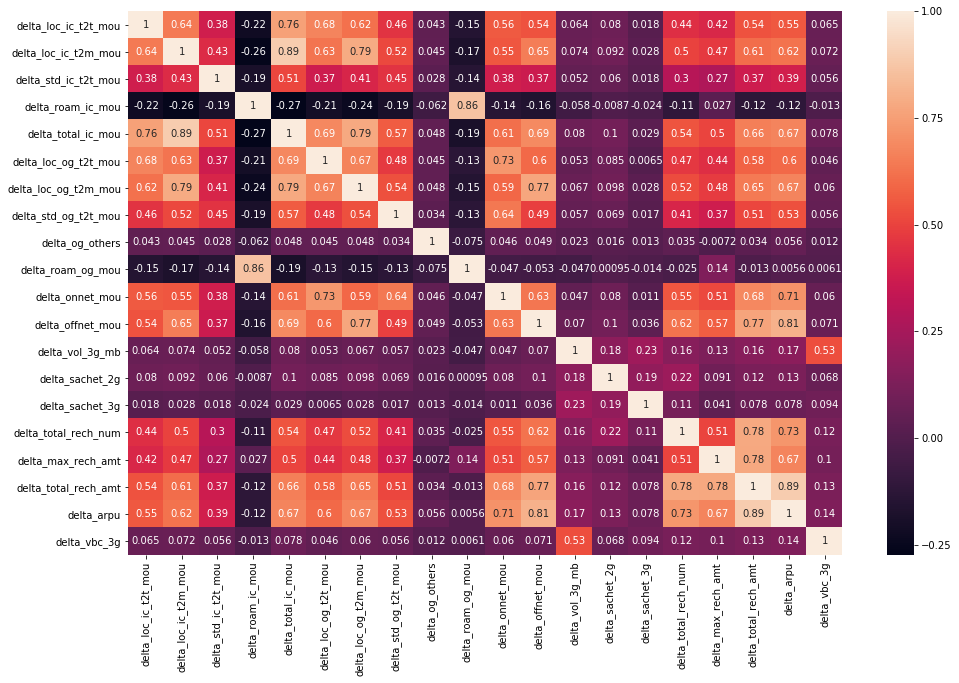

In [41]:
plt.figure(figsize = (16,10)) 
sns.heatmap(X[col].corr(),annot = True)

In [42]:
rfe_df = X[col]

In [43]:
rfe_df.drop(['delta_loc_ic_t2m_mou',
             'delta_loc_og_t2m_mou',
             'delta_loc_og_t2t_mou',
             'delta_loc_ic_t2t_mou',
             'delta_roam_og_mou',
             'delta_offnet_mou',
             'delta_onnet_mou',
             'delta_arpu',
             'delta_max_rech_amt',
             'delta_total_rech_amt',
             'delta_total_rech_num'], axis=1, inplace=True)

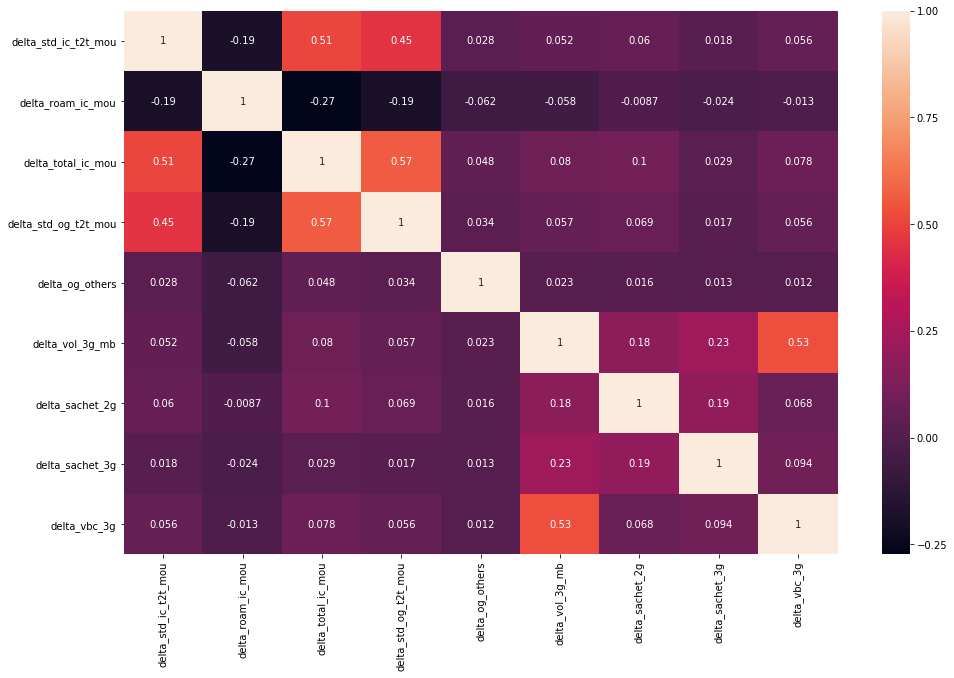

In [44]:
plt.figure(figsize = (16,10)) 
sns.heatmap(rfe_df.corr(),annot = True)

In [45]:
rfe_df.columns

Index(['delta_std_ic_t2t_mou', 'delta_roam_ic_mou', 'delta_total_ic_mou', 'delta_std_og_t2t_mou', 'delta_og_others', 'delta_vol_3g_mb', 'delta_sachet_2g', 'delta_sachet_3g', 'delta_vbc_3g'], dtype='object')

#### Hence the most significant features are :
- delta_std_ic_t2t_mou
- delta_roam_ic_mou
- delta_total_ic_mou
- delta_std_og_t2t_mou
- delta_og_others
- delta_vol_3g_mb
- delta_sachet_2g
- delta_sachet_3g
- delta_vbc_3g


All of these features are derived features. The name **delta_feature** tells the magnitude of change in the **feature** in first three months. (Note that other features that have been removed are also important. It's just that they are collinear with this above features, so they have been removed.)

# 6. Model generation

### 6.1 Scaling 

In [46]:
from sklearn import preprocessing
X_scaler = preprocessing.StandardScaler().fit(X)
X = X_scaler.transform(X) 

### 6.2 Feature reduction using PCA
Since there are too many features, it will be useful to reduuce them so that the analysis is fast and efective. We will lose the reasoning behind the churn cause though.

#### Scree plot
Going ahead with 20 components as they are able to explain 88% of variance. If the accuracy of models is less going forward, will increase the components.

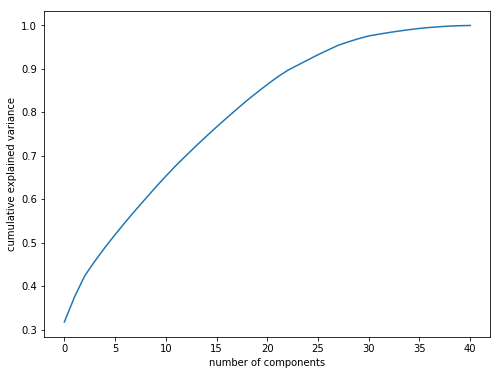

In [47]:
from sklearn.decomposition import PCA

pca = PCA(svd_solver='randomized', random_state=101)
pca.fit(X)

fig = plt.figure(figsize = (8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [48]:
pca = PCA(n_components=20,random_state=100)

# fit_transform and transform to get the reduced data
X = pca.fit_transform(X)

### 6.3 Split test/train

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [50]:
cols=['a', 'b', 'c', 'd', 'e', 'f',
         'g', 'h', 'i', 'j', 'k', 'l',
         'm', 'n', 'o', 'p', 'q', 'r',
         's', 't']
X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)

### 6.4 Logistic regression

#### 6.4.1 Fit the model

In [51]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                34037
Model:                            GLM   Df Residuals:                    34016
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12591.
Date:                Mon, 18 Nov 2019   Deviance:                       25183.
Time:                        02:17:01   Pearson chi2:                 7.74e+04
No. Iterations:                     6   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4285      0.016    -26.256      0.000      -0.460      -0.397
a             -0.5906      0.006    -97.408      0.0

#### 6.4.2 Verify the VIF values.

In [52]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

   Features  VIF
0         a  1.0
1         b  1.0
18        s  1.0
17        r  1.0
16        q  1.0
15        p  1.0
14        o  1.0
13        n  1.0
12        m  1.0
11        l  1.0
10        k  1.0
9         j  1.0
8         i  1.0
7         h  1.0
6         g  1.0
5         f  1.0
4         e  1.0
3         d  1.0
2         c  1.0
19        t  1.0


#### 6.4.3 Predict the test data

In [53]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)

In [54]:
y_train_pred_final = pd.DataFrame({'Churn':y_train, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churn,Churn_Prob
0,1,0.968974
1,0,0.378141
2,1,0.829248
3,0,0.155039
4,1,0.760061


#### Choose cut-off to be 0.5 for now

In [55]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,1,0.968974,1
1,0,0.378141,0
2,1,0.829248,1
3,0,0.155039,0
4,1,0.760061,1


In [56]:
from sklearn import metrics

In [57]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[16715  2209]
 [ 2484 12629]]


### Note - In our case study, we do not want to lose the high value customers. So, our aim is to identify them correctly. Hence, the model should have high sensitivity.

In [58]:
def calcSensi(confusion):
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print(TP / float(TP+FN))
    
def calcAccuracy(confusion):
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print((TP + TN) / float(TP + TN + FP + FN))

In [59]:
calcSensi(confusion)

0.835638192284788


The sensitivity for the 0.5 cut-off is 0.83. Let's look at ROC curve.

#### 6.4.4 Plotting the ROC Curve

In [60]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [61]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

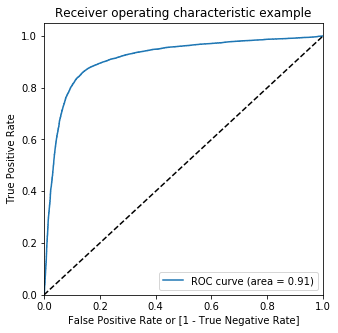

In [62]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

#### 6.4.5 Find optimal cut-off

In [63]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.968974,1,1,1,1,1,1,1,1,1,1,1
1,0,0.378141,0,1,1,1,1,0,0,0,0,0,0
2,1,0.829248,1,1,1,1,1,1,1,1,1,1,0
3,0,0.155039,0,1,1,0,0,0,0,0,0,0,0
4,1,0.760061,1,1,1,1,1,1,1,1,1,0,0


In [64]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.444017  1.000000  0.000000
0.1   0.1  0.685225  0.965857  0.461108
0.2   0.2  0.794165  0.932310  0.683841
0.3   0.3  0.838676  0.899160  0.790372
0.4   0.4  0.857655  0.871038  0.846967
0.5   0.5  0.862121  0.835638  0.883270
0.6   0.6  0.855951  0.788857  0.909533
0.7   0.7  0.838470  0.719712  0.933312
0.8   0.8  0.796927  0.597631  0.956088
0.9   0.9  0.703176  0.357705  0.979074


##### 0.35 looks like a good cut-off for high sensitivity and significant accuracy

#### 6.4.6 Prection on test data

In [65]:
X_test_sm = sm.add_constant(X_test)

In [66]:
y_test_pred = res.predict(X_test_sm)

In [67]:
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.reset_index(drop=True, inplace=True)
y_test_pred = y_test_pred.rename(columns={ 0 : 'Churn_Prob'})
y_test_pred.head()

,Churn_Prob
0,0.002569
1,0.139710
2,0.105470
3,0.173858
4,0.728583


In [68]:
y_test = pd.DataFrame(y_test)
y_test.reset_index(drop=True, inplace=True)
y_test= y_test.rename(columns={ 0 : 'Churn'})
y_test.head()

,Churn
0,0
1,0
2,0
3,0
4,0


In [69]:
y_pred_final = pd.concat([y_test, y_test_pred],axis=1)

In [70]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.350 else 0)

#### 6.4.7 Calculate accuracy and sensitivity on test data

In [71]:
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.8484370715656704

In [72]:
confusion = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion

array([[6603, 1487],
       [ 724, 5774]])

In [73]:
calcSensi(confusion)

0.8885811018775007


### 6.5 SVM

#### 6.5.1 Fit the model
SVM is very slow on this data.
Running GridSearch takes a lot of time. 
By trying out individual C and gamma, the best accuracy and sensitivity was scored by **C=10, gamma = 0.1**

Tried values :
- C - [ 0.1, 1, 10 ]
- gamma - [ 0.001, 0.01, 0.1, 1 ]

In [74]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=10, gamma=0.1)
svm.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### 6.5.2 Predict the test data

In [75]:
y_test_pred = svm.predict(X_test)

#### 6.5.3 Calculate accuracy and sensitivity

In [76]:
confusion = metrics.confusion_matrix(y_test, y_test_pred )
confusion

array([[7805,  285],
       [  38, 6460]])

In [77]:
calcAccuracy(confusion)

0.9778585138469975


In [78]:
calcSensi(confusion)

0.9941520467836257


### 6.6 Decision Tree

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#### 6.6.1 Find the right hyperparams
Let's start with max_depth

In [80]:
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 20)}
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")

tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 20)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [81]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.084281,0.014949,0.001470,0.000598,1,{'max_depth': 1},0.818596,0.813895,0.817421,0.811811,0.806641,0.813673,0.004272,19,0.814389,0.814830,0.814499,0.816159,0.816606,0.815297,0.000909
1,0.139540,0.005689,0.001096,0.000039,2,{'max_depth': 2},0.829612,0.839600,0.840922,0.833554,0.838378,0.836413,0.004214,18,0.834882,0.841897,0.834662,0.834007,0.844369,0.837963,0.004302
2,0.199803,0.004192,0.001121,0.000059,3,{'max_depth': 3},0.846651,0.854289,0.858108,0.853386,0.846900,0.851867,0.004450,17,0.855448,0.853318,0.852877,0.852112,0.853953,0.853542,0.001126
3,0.255708,0.004520,0.001285,0.000201,4,{'max_depth': 4},0.855464,0.857374,0.863984,0.856324,0.852924,0.857214,0.003691,16,0.860884,0.862610,0.858717,0.860889,0.862473,0.861114,0.001410
4,0.312146,0.005467,0.001211,0.000041,5,{'max_depth': 5},0.868096,0.867362,0.871769,0.866608,0.864678,0.867703,0.002330,15,0.875170,0.874766,0.874068,0.875872,0.873049,0.874585,0.000965


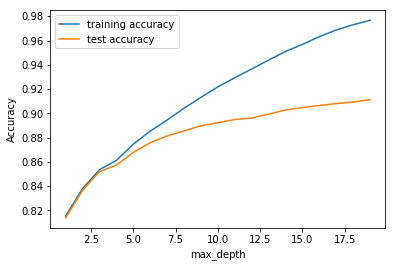

In [82]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In the above graph, there is a rapid increase in the accuracy of test data till max_depth = 10. After that it gets stable till max_depth=17.

But in order to keep the model simple, max_depth=10 is a good choice.

In [83]:
dtree = DecisionTreeClassifier(criterion = "gini", max_depth=3)
dtree.fit(X_train, y_train)
print((dtree.score(X, y))*100)

85.26478149100257


#### 6.6.2 Tuning min_samples_leaf

In [84]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [85]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.109517,0.041385,0.001801,0.000078,5,{'min_samples_leaf': 5},0.898208,0.904230,0.912603,0.904363,0.909051,0.905691,0.004878,1,0.966286,0.965074,0.966212,0.966250,0.965884,0.965941,0.000457
1,0.931563,0.024312,0.002034,0.000420,25,{'min_samples_leaf': 25},0.888367,0.888073,0.895123,0.888056,0.896709,0.891265,0.003832,2,0.917331,0.914429,0.916817,0.916710,0.917263,0.916510,0.001068
2,0.821671,0.011535,0.001628,0.000084,45,{'min_samples_leaf': 45},0.882344,0.886751,0.889982,0.882474,0.884220,0.885154,0.002892,3,0.904183,0.900584,0.901135,0.902167,0.903345,0.902283,0.001338
3,0.751536,0.010983,0.001601,0.000139,65,{'min_samples_leaf': 65},0.879700,0.886457,0.891011,0.878654,0.884367,0.884038,0.004525,4,0.897426,0.893937,0.892247,0.892214,0.896882,0.894541,0.002229
4,0.722754,0.005667,0.001716,0.000337,85,{'min_samples_leaf': 85},0.878525,0.879700,0.888367,0.880270,0.882897,0.881952,0.003512,5,0.891513,0.890191,0.889272,0.889754,0.892439,0.890634,0.001171


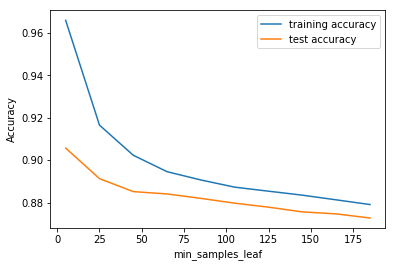

In [86]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

At low values of min_samples_leaf, the tree gets a bit overfitted. At values > 100, however, the model becomes more stable and the training and test accuracy start to converge. 50 is a middle ground. 

#### 6.6.3 Let's try to create the model using the hyperparametres.

In [87]:
# tree with max_depth = 3
tree = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [88]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.90      0.89      8090
          1       0.87      0.85      0.86      6498

avg / total       0.88      0.88      0.88     14588



#### 6.6.4 Calculate accuracy and sensitivity

In [89]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[7285  805]
 [ 970 5528]]


In [90]:
calcSensi(confusion_matrix(y_test,y_pred))

0.8507232994767621


In [91]:
calcAccuracy(confusion_matrix(y_test,y_pred))

0.878324650397587


### 6.7 Random forest

#### 6.7.1 Tune hyperparametres
Start with max_depth

In [92]:
from sklearn.ensemble import RandomForestClassifier

# number of CV folds
n_folds = 5

# parameters to build the model on
# max_depth - [0-100]
# n_extimators - 20
parameters = {'max_depth': range(1, 15)}
dtree = RandomForestClassifier(criterion = "gini",
                               n_estimators= 20,
                               random_state = 100)

tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 15)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [93]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.261769,0.015737,0.007769,0.000470,1,{'max_depth': 1},0.826381,0.823296,0.819771,0.814603,0.816779,0.820166,0.004266,14,0.821477,0.825443,0.816923,0.819354,0.819617,0.820563,0.002838
1,0.430887,0.019927,0.008641,0.000613,2,{'max_depth': 2},0.835928,0.839600,0.830053,0.822683,0.823979,0.830449,0.006574,13,0.834074,0.837196,0.828382,0.827506,0.832911,0.832014,0.003617
2,0.584854,0.009184,0.009775,0.000834,3,{'max_depth': 3},0.848854,0.840041,0.845476,0.843543,0.837937,0.843171,0.003871,12,0.849242,0.839326,0.842117,0.848219,0.843304,0.844441,0.003746
3,0.740906,0.016397,0.009886,0.000421,4,{'max_depth': 4},0.864865,0.865012,0.871328,0.867636,0.864384,0.866645,0.002602,11,0.866099,0.868339,0.867311,0.872530,0.868826,0.868621,0.002167
4,0.883268,0.008482,0.011241,0.000719,5,{'max_depth': 5},0.868096,0.872944,0.877644,0.862788,0.870555,0.870406,0.004944,10,0.875647,0.878953,0.874105,0.871245,0.876207,0.875231,0.002535


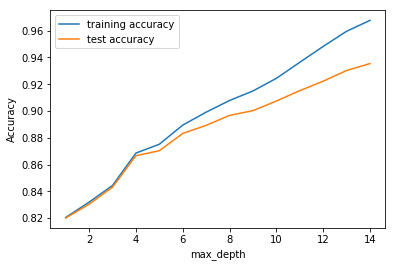

In [94]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In the above graph, there is a rapid increase in the accuracy of test data till max_depth = 12. After that it gets stable.

But in order to keep the model simple, **max_depth = 12 is a good choice**.

#### 6.7.2 Tune min_samples_leaf

In [95]:
from sklearn.ensemble import RandomForestClassifier

# number of CV folds
n_folds = 5

# parameters to build the model on
# min_sample_leaf - [5-200]
# n_extimators - 20
parameters = {'min_samples_leaf': range(5, 200, 20)}

dtree = RandomForestClassifier(criterion = "gini",
                               n_estimators= 20,
                               random_state = 100)

tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [96]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.596756,0.043446,0.023770,0.001611,5,{'min_samples_leaf': 5},0.935223,0.937720,0.946533,0.938740,0.940494,0.939742,0.003800,1,0.976165,0.975981,0.976239,0.976019,0.975139,0.975909,0.000396
1,2.146866,0.042738,0.019743,0.001197,25,{'min_samples_leaf': 25},0.907021,0.910253,0.918772,0.910533,0.908904,0.911097,0.004034,2,0.928863,0.928936,0.925961,0.929453,0.927803,0.928203,0.001243
2,2.122219,0.181670,0.020181,0.002990,45,{'min_samples_leaf': 45},0.903937,0.901880,0.910693,0.900837,0.901557,0.903781,0.003606,3,0.916706,0.916266,0.914025,0.915791,0.912489,0.915056,0.001573
3,1.826274,0.017762,0.017653,0.000705,65,{'min_samples_leaf': 65},0.896152,0.899089,0.903643,0.896577,0.895827,0.898258,0.002928,4,0.908002,0.906901,0.905909,0.908777,0.906393,0.907197,0.001052
4,1.747410,0.039631,0.017422,0.001057,85,{'min_samples_leaf': 85},0.891892,0.893948,0.900264,0.889232,0.888775,0.892823,0.004166,5,0.901980,0.899409,0.900033,0.901175,0.899343,0.900388,0.001032


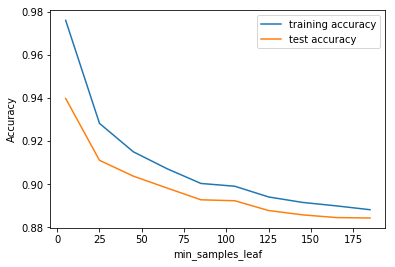

In [97]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

At low values of min_samples_leaf, the tree gets a bit overfitted. At values > 100, however, the model becomes more stable and the training and test accuracy start to converge. 50 is a middle ground.

#### 6.7.3 Fit the model

In [98]:
dtree = RandomForestClassifier(criterion = "gini",
                               n_estimators= 200,
                               max_depth=12,
                               min_samples_leaf=50,
                               min_samples_split=50)
dtree.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### 6.7.4 Predict the test data

In [99]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = dtree.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.92      0.91      8090
          1       0.89      0.89      0.89      6498

avg / total       0.90      0.90      0.90     14588



#### 6.7.5 Calculate accuracy and sensitivity

In [100]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[7411  679]
 [ 735 5763]]


In [101]:
calcSensi(confusion_matrix(y_test,y_pred))

0.8868882733148661


In [102]:
calcAccuracy(confusion_matrix(y_test,y_pred))

0.9030710172744721


# 7. Model evaluation and conclusion

We used four algorithms to generate models. The summary is as follows.

| Algorithm   | Accuracy | Sensitivity |
| ----------- | ----------- |-----------|
| Logistic Regression | 0.84     | 0.88       |
| SVM        | 0.97     | 0.99       |
| Decision Tree | 0.85 | 0.88 |
| Random Forest | 0.89 | 0.90 |

For our case, the SVM model we created works the best because it has high **sensitivity** w.r.t. to other models.

# 8. Recommendation

#### 8.1 We did RFE in an earlier step to determine strong indicators for churn.  From the analysis, we can make following conclusion.

if a customer is seen to perform following actions, then it might be a strong indicator for them to about to churn very soon.
- If they are decreasing their
    - local incoming t2t/t2m mou
    - local outgoing t2t/t2m mou
    - std incoming t2t mou
    - roaming incoming mou
    - roaming outgoing mou
    - offnet/onnet mou
    - 3g volume
    - 3g/2g sachet
    - total recharge amount
    - max recharge amount
    
The telecom company should watch out for these signs and take actions before the customer churns.

#### 8.2 Business insights
If we look closely, then the two strong indicators groups for the churners are decline in ic/og calls and 2g/3g volume. Thus, the user is planning to switch to other telecom provider. 

The most common reasons why a user switches the provider are -
- Bad service of the current provider.
    - The population of the area might have increased.
    - The user might have moved to another location where service is not good.
    - A competitor with better service might have launched in his area.
- Costly tariff
    - The competitior might have reduced their tariff.



--> Ends here <--